> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No-show appointments
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

    -‘ScheduledDay’ tells us on what day the patient set up their appointment.
    -‘Neighborhood’ indicates the location of the hospital. 
    -‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
    

In [59]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.



So, we have 14 variables and 110527 records.

Now in this step, I will prepare the data for the analysis by checking if there is missing values or invalid values.
### General Properties

In [60]:
#Dimensions of the Dataset
df.shape

(110527, 14)

In [61]:
 ## take a sample of dataset.
display(df.head(5)) 


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [62]:
 ## take a sample of dataset. 
display(df.tail(5)) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No




Good, there are no missing values!! now I will classify the variables into four groups patient information, appointment information, health situation and the general information, I think this will help me in data preparation process.

1- Patient Information

PatientId

Gender

Age

I will ignore Patient Id as I think it has no importance in our analysis. Now let check the values of Gender and Age:

There are tow values for gender M = male and F= Female so no need to perform any cleaning or auditing process, but in the Age variable We can see strang values for some patients like 100 and above and negative values, I wonder if the negative values mean baby before born or it may come from a typo error however as I'm not sure about this value I will delete it, also I check in the geoba.se and I found the average of life expectancy in Brazil is about 74.06 and there are just 4,388 people have age 100 and above so I will choose to delete patients who have age in this range.In addition we will classify the patient according to their age to child, adult and senior.


2- Appointment Information

AppointmentID

ScheduledDay

AppointmentDay

for the group of Appointment Information, I will remove the AppointmentID from our dataset and reformate the ScheduledDay, in addition, i will create a new variable WaitingDay which mean the duration between the scheduled date and the appointment date.

3.Health Situation

Hypertension

Diabetes

Alcoholism

Handcap

4- Genral Infomation

SMS_received

No-show

Neighbourhood

Scholarship

ok, we start with 14 varibles and now we end up with 21 varibles,I think the data seems to be clean enughe and valied to start the analysis.



In [63]:
# delete the patient Id 
del df["PatientId"]
# check the values of the rest of patient information group.
print ("Gender:{}".format(list(set (df["Gender"])))) 
print ("Age : {}".format(list(set(df["Age"]))))

Gender:['M', 'F']
Age : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115, -1]


In [64]:
 df = df[(df["Age"] < 100) & (df["Age"]>0)] 

In [65]:
def FormatAge (age):
    if age['Age']>0 and age['Age']<=17 :
        return 'Child'
    elif age['Age']>=18 and age['Age'] <50:
        return 'Adult'
    else:
        return 'Senior'


In [66]:
df['AgeClass'] = df.apply(FormatAge,axis=1)

In [67]:
 # AppointmentID 
df.head()


,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AgeClass
0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Senior
1,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Senior
2,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Senior
3,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Child
4,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Senior


In [68]:
 # Reformatting the Scheduled Date and Appointment Day 
def AppointmentFormat(df):  
    df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"], format="%Y/%m/%d %H:%M:%S")
    df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"], format="%Y/%m/%d %H:%M:%S") 
    df["Scheduledyear"]= df["ScheduledDay"].dt.year 
    df["Scheduledmonth"]= df["ScheduledDay"].dt.month   
    df["Scheduledweek"]= df["ScheduledDay"].dt.weekday   
    df["Scheduledhour"]= df["ScheduledDay"].dt.hour 
# Appointment Day Reformatting and create additional col 
    df["Appointmentyear"]= df["AppointmentDay"].dt.year  
    df["Appointmentmonth"]= df["AppointmentDay"].dt.month   
    df["Appointmentweek"]= df["AppointmentDay"].dt.weekday 
    df['WaitingDay']=np.where(df.ScheduledDay.dt.date==df.AppointmentDay.dt.date, 0, df.AppointmentDay.sub(df.ScheduledDay))

    
AppointmentFormat(df) 

In [69]:
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,...,No-show,AgeClass,Scheduledyear,Scheduledmonth,Scheduledweek,Scheduledhour,Appointmentyear,Appointmentmonth,Appointmentweek,WaitingDay
0,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,...,No,Senior,2016,4,4,18,2016,4,4,0 days
1,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,...,No,Senior,2016,4,4,16,2016,4,4,0 days
2,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,...,No,Senior,2016,4,4,16,2016,4,4,0 days
3,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,...,No,Child,2016,4,4,17,2016,4,4,0 days
4,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,...,No,Senior,2016,4,4,16,2016,4,4,0 days


In [70]:
 # correcte the misspiling for Hipertension clumane
df = df.rename(columns = {'Hipertension':'Hypertension'}) 

In [71]:
#chek the valus of varibles. 
print ("Hypertension:{}".format(list(set (df["Hypertension"])))) 
print ("Diabetes : {}".format(list(set(df["Diabetes"])))) 
print ("Alcoholism:{}".format(list(set(df["Alcoholism"])))) 
print ("Handcap : {}".format(list(set(df["Handcap"]))))

Hypertension:[0, 1]
Diabetes : [0, 1]
Alcoholism:[0, 1]
Handcap : [0, 1, 2, 3, 4]


In [72]:
(df.shape) 

(106976, 22)

In [73]:
del df["AppointmentID"] 

In [74]:
(df.shape) 

(106976, 21)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning ()
  
   20.27%) of the Patients not attend the appointment and approximately (79.73%) of them came to their appointment, so we will try to go deeper in the data and identify how each features play roles in this problem.

In [75]:
print (df.groupby("No-show").size()) 

No-show
No     85299
Yes    21677
dtype: int64


In [76]:
print('Distribution of Gender')
print(df.groupby(['Gender']).Gender.count())

Distribution of Gender
Gender
F    70109
M    36867
Name: Gender, dtype: int64


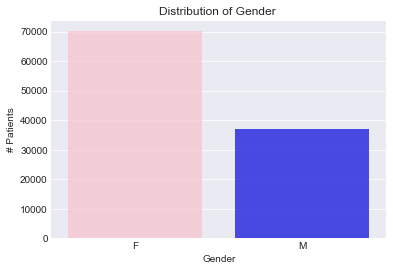

In [77]:
sns.set_style('darkgrid')
sns.countplot(df['Gender'], alpha =.80, palette= ['pink','blue'])
plt.title('Distribution of Gender ')
plt.ylabel('# Patients')
plt.show()

In [78]:
print(df.groupby('Gender')['No-show'].value_counts(normalize = True))

Gender  No-show
F       No         0.796431
        Yes        0.203569
M       No         0.799143
        Yes        0.200857
Name: No-show, dtype: float64


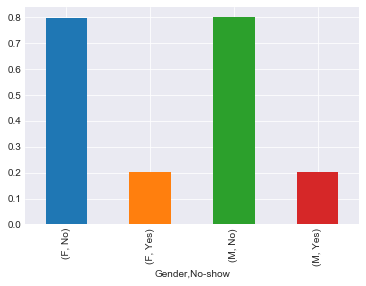

In [79]:
df.groupby('Gender')['No-show'].value_counts(normalize = True).plot(kind='bar')
plt.show()

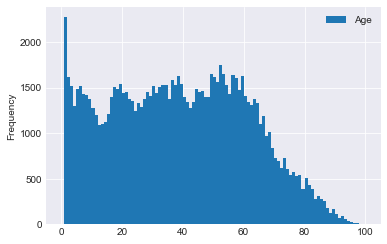

In [80]:
##Age Distrabuation
df.plot(kind = "hist",y = "Age",bins =100,range= (0,100)) 
plt.show() 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1         (How the Patient gender play role in this analysis?)

(20.27%) of the Patients not attend the appointment and approximately (79.73%) of them came to their appointment, so we will try to go deeper in the data and identify how each features play roles in this problem.


We can see the women are most likely visit the hospitals than men this may due to several reasons : women take care about her health than men and also the pregnant woman usually visit the hospital several time during her pregnancy, and we may consider that the population mean for women is greater than mean in Brazil, but when we foucse on the (Show up) statuse we can see 79.6% of wamen attened to their appointment compared to 79.9% of men, so women and men are most likly to have the same rate of attendance.



In [81]:

print (df.groupby("No-show").size()) 

No-show
No     85299
Yes    21677
dtype: int64


In [83]:
print('Distribution of Gender')
print(df.groupby(['Gender']).Gender.count())

Distribution of Gender
Gender
F    70109
M    36867
Name: Gender, dtype: int64


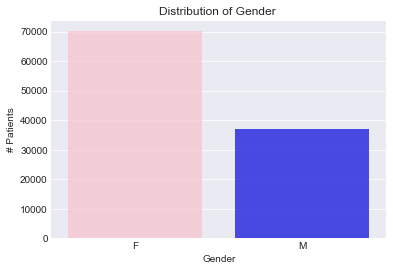

In [84]:
sns.set_style('darkgrid')
sns.countplot(df['Gender'], alpha =.80, palette= ['pink','blue'])
plt.title('Distribution of Gender ')
plt.ylabel('# Patients')
plt.show()

In [85]:
print(df.groupby('Gender')['No-show'].value_counts(normalize = True))

Gender  No-show
F       No         0.796431
        Yes        0.203569
M       No         0.799143
        Yes        0.200857
Name: No-show, dtype: float64


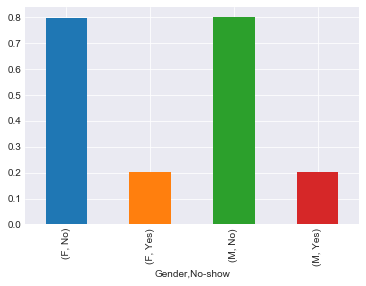

In [86]:
df.groupby('Gender')['No-show'].value_counts(normalize = True).plot(kind='bar')
plt.show()

### Research Question 2  (Does the Age affected the patient attendance to their appointment? Dose the elderly woman take care about her health more than elderly man?)

Most patients were between the age of 18 and 49 and the patients below 18 years has the minimum rate of visiting the hospital. However, when we see the show-up status we found patients above 50 years are most likely did not attend their appointment and also the gender did not play any role in this analysis.

In the appointment month it just includes 3 months!! on another hand the Scheduled month missed the months (7 to 10). However, in both diagrams, the most rate appointment was in may which is the end of Autumn in Brazile.

The patient tends to attend his appointment in the middle of the week, and no show up at the end of the week, especially in Thursday. If we focus on the waiting day and how the data is distribution we can see there is a drop in the appointment number after the three months of waiting especially for the group who not came to there appointments.



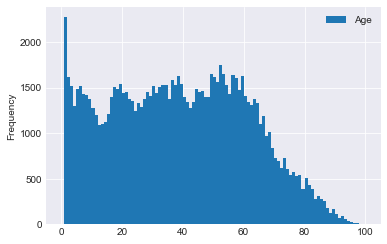

In [87]:

##Age Distrabuation
df.plot(kind = "hist",y = "Age",bins =100,range= (0,100)) 
plt.show() 

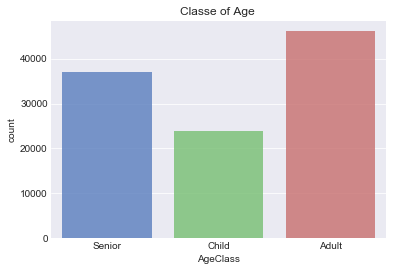

AgeClass  No-show
Adult     No         0.776539
          Yes        0.223461
Child     No         0.775252
          Yes        0.224748
Senior    No         0.837542
          Yes        0.162458
Name: No-show, dtype: float64


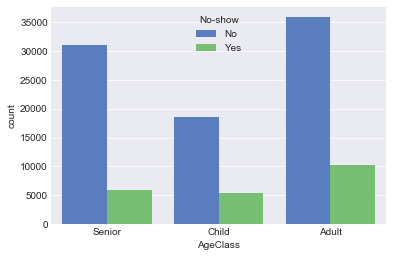

In [88]:
# number of patient according to thier aGE CLAss
sns.set_style('darkgrid')

sns.countplot(df['AgeClass'], alpha =.80,palette="muted")
plt.title('Classe of Age ')
plt.show()

print (df.groupby('AgeClass')['No-show'].value_counts(normalize = True))

sns.set_style('darkgrid')
fig = sns.countplot(x='AgeClass', data=df,hue='No-show', palette="muted");
plt.show()

In [89]:
pd.pivot_table(df,index=['AgeClass','No-show','Gender'],values=["Age"])

Age
AgeClass No-show Gender           
Adult    No      F       33.572489
                 M       34.514534
         Yes     F       32.584786
                 M       33.333793
Child    No      F        8.753021
                 M        7.659483
         Yes     F        9.609187
                 M        8.618356
Senior   No      F       63.419264
                 M       63.633761
         Yes     F       62.957364
                 M       62.999470

Text(0.5,1,'Scheduledmonth')

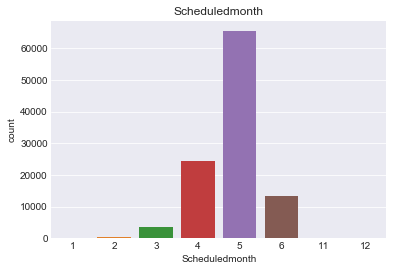

In [90]:
sns.countplot(df['Scheduledmonth'])
plt.title('Scheduledmonth')

Text(0.5,1,'Appointmentmonth')

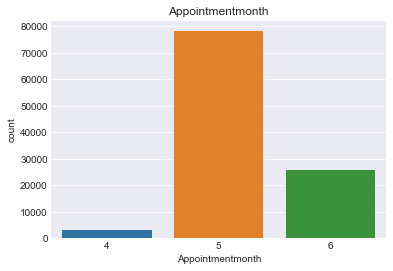

In [91]:
sns.countplot(df['Appointmentmonth'])
plt.title('Appointmentmonth')

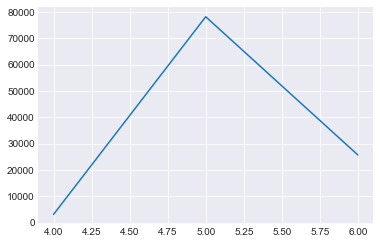

In [92]:
df.Appointmentmonth.value_counts().sort_index().plot()

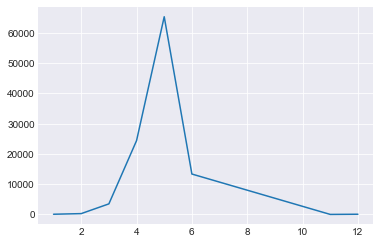

In [93]:
df.Scheduledmonth.value_counts().sort_index().plot()

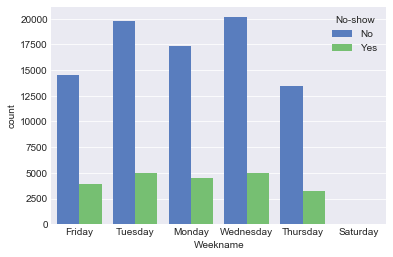

In [94]:
df["Weekname"] = df.AppointmentDay.dt.weekday_name
fig = sns.countplot(x='Weekname', data=df,hue='No-show', palette="muted");
plt.show()

In [95]:
df['WaitingDay'] = df['WaitingDay'].astype('timedelta64[D]')
print(df.WaitingDay.max())
print (df.WaitingDay.min())
## delete the nagative values
##check the nigative valuues 
#Patient.loc[Patient['WaitingDay']<0]
df=df[df.WaitingDay>=0]

178.0
-7.0


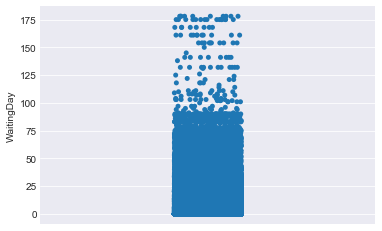

In [96]:
## waiting day distrbuation
sns.stripplot(y="WaitingDay",data=df, jitter=True)

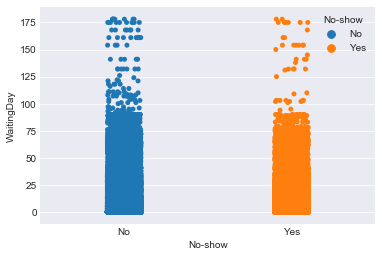

In [97]:
sns.stripplot(x="No-show" ,y="WaitingDay",hue="No-show",data=df, jitter=True)

In [98]:
print(df["Handcap"].value_counts())
print(df.groupby('Handcap')['No-show'].value_counts(normalize = True))

0    104739
1      2033
2       183
3        13
4         3
Name: Handcap, dtype: int64
Handcap  No-show
0        No         0.796924
         Yes        0.203076
1        No         0.822430
         Yes        0.177570
2        No         0.797814
         Yes        0.202186
3        No         0.769231
         Yes        0.230769
4        No         0.666667
         Yes        0.333333
Name: No-show, dtype: float64


In [99]:
print(df["SMS_received"].value_counts())

print(df.groupby('SMS_received')['No-show'].value_counts(normalize = True))

0    72388
1    34583
Name: SMS_received, dtype: int64
SMS_received  No-show
0             No         0.832790
              Yes        0.167210
1             No         0.723332
              Yes        0.276668
Name: No-show, dtype: float64


In [100]:
## convert to numercal
df = df.replace('Yes',1)
df = df.replace('No',0)

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. It's also a good idea to look over the project rubric, found on the project submission page at the end of the lesson.

> To export the report to the workspace, you should run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the jupyter icon in the upper left). Alternatively, you can download the html report via the **File** > **Download as** submenu and then manually upload it to the workspace directory. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right. Congratulations!




Conclusion 

I try to identify how each variable in the dataset could affect the patient show up status and I found the adult patient tend to came to their appointment more than other ages also the patient are more likely to show up in middle of week more than the start of week and finally I built a predictive model to predict the patient who no show up, However there a lot to do to explore more variables in this data set and also the predictive model need to optimize.

In [101]:
## convert to numercal
df = df.replace('Yes',1)
df = df.replace('No',0)

In [102]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["Neighbourhood"])
df["Neighbourhood"]=le.transform(df["Neighbourhood"])

In [103]:
df = df.drop(['ScheduledDay','AppointmentDay','AgeClass','Weekname','Gender'],axis=1)

In [104]:
#cols = Patient.columns.tolist()
#cols = cols[-1:] + cols[:-1]
#Patient = Patient[cols] 

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106971 entries, 0 to 110526
Data columns (total 17 columns):
Age                 106971 non-null int64
Neighbourhood       106971 non-null int64
Scholarship         106971 non-null int64
Hypertension        106971 non-null int64
Diabetes            106971 non-null int64
Alcoholism          106971 non-null int64
Handcap             106971 non-null int64
SMS_received        106971 non-null int64
No-show             106971 non-null int64
Scheduledyear       106971 non-null int64
Scheduledmonth      106971 non-null int64
Scheduledweek       106971 non-null int64
Scheduledhour       106971 non-null int64
Appointmentyear     106971 non-null int64
Appointmentmonth    106971 non-null int64
Appointmentweek     106971 non-null int64
WaitingDay          106971 non-null float64
dtypes: float64(1), int64(16)
memory usage: 19.7 MB


In [106]:
y = df['No-show'].values
del df['No-show']
x = df.values
#print (np.unique(y))

In [107]:
##from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
clf = tree.DecisionTreeClassifier(max_depth=15)
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
print('With DecisionTree accurcy',clf.score(x_test,y_test))
#print "This is the validation matrix"
##report = classification_report(y_test, pred )
##print report

With DecisionTree accurcy 0.7663903776642154
